In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Вариант

In [6]:
variant = 8 # Изменяйте ТОЛЬКО значение варианта 
 
test_signal_duration = 100 
dt = 0.01 
test_sig_ampl = 1 + variant * 0.1 
test_sig_freq = 1 + variant * 3.5 
non_lin_param_1 = 0.5 + variant * 0.1 
lin_param_k = 0.5 + variant * 0.3 
lin_param_T = 0.1 + variant * 0.2 
 
print("Вариант номер {}".format(variant)) 
print("Период дискретизации сигнала: {:.2} с".format(dt)) 
print("Амплитуда  тестового  сигнала: {:.2}".format(test_sig_ampl)) 
print("Частота  тестового  сигнала:  {:.2} Гц".format(test_sig_freq)) 
print("Длительность  тестового  сигнала:  {} с".format(test_signal_duration)) 
print("Параметр  нелинейностей  1: {:.2}".format(non_lin_param_1)) 
print("Коэффициент  усиления  линейного  звена: {:.2}".format(lin_param_k)) 
print("Постоянная  времени  линейного  звена: {:.2}".format(lin_param_T))


Вариант номер 8
Период дискретизации сигнала: 0.01 с
Амплитуда  тестового  сигнала: 1.8
Частота  тестового  сигнала:  2.9e+01 Гц
Длительность  тестового  сигнала:  100 с
Параметр  нелинейностей  1: 1.3
Коэффициент  усиления  линейного  звена: 2.9
Постоянная  времени  линейного  звена: 1.7


# Зададим вектор времени

In [7]:
t = np.arange(0, test_signal_duration, dt) 
 
print("Размерность массива: {}".format(t.shape)) 
print("Содержимое массива: {}".format(t)) 

Размерность массива: (10000,)
Содержимое массива: [0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]


Зададим sin

In [8]:
sig_sin = np.sin(t * 2 * np.pi) 
 
print("Размерность сигнала: {}".format(sig_sin.shape)) 
print("Содержимое массива сигнала: {}".format(sig_sin))

Размерность сигнала: (10000,)
Содержимое массива сигнала: [ 0.          0.06279052  0.12533323 ... -0.18738131 -0.12533323
 -0.06279052]


Выведем график

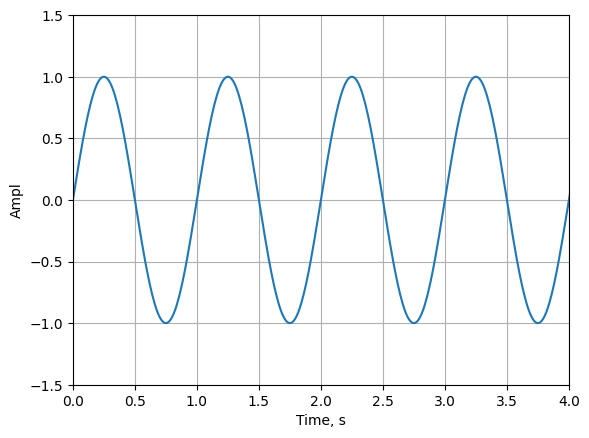

In [9]:
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.ylim(-1.5, 1.5) 
plt.xlim(0, 4) 
plt.plot(t, sig_sin) 

Спектр сигнала

In [10]:
sig_sin_spec = np.abs(np.fft.fft(sig_sin)) 
print("Размерность массива спектра: {}".format(sig_sin_spec.shape)) 
print("Содержимое массива спектра: {}".format(sig_sin_spec)) 

Размерность массива спектра: (10000,)
Содержимое массива спектра: [5.23685120e-14 4.45462047e-13 2.36038577e-13 ... 3.06150389e-13
 2.36038577e-13 4.45462047e-13]


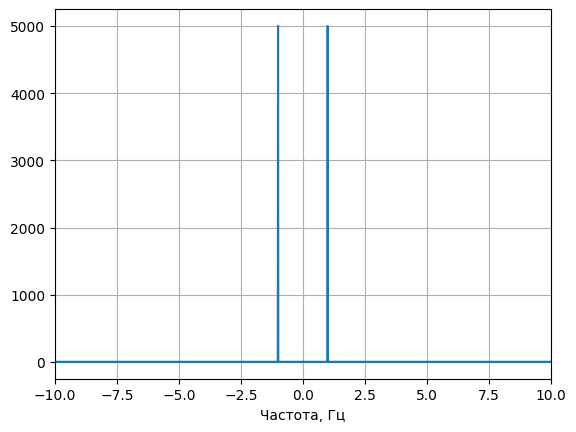

In [13]:
freqs = np.fft.fftfreq(sig_sin.shape[0], dt)

plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_sin_spec) 

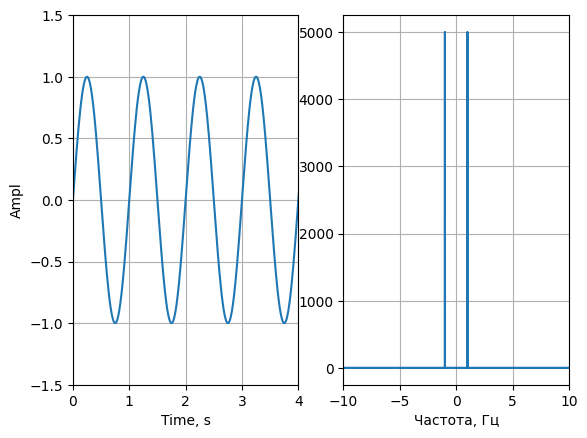

In [14]:
plt.subplot(1, 2, 1) 
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.ylim(-1.5, 1.5) 
plt.xlim(0, 4) 
plt.plot(t, sig_sin) 
 
plt.subplot(1, 2, 2) 
plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_sin_spec)

Другие сигналы

Типовые НЭ

In [18]:
def dead_zone_scalar(x, width = 0.5): 
    if np.abs(x)<width: 
        return 0 
    elif x>0: 
        return x-width 
    else: 
        return x+width 
         
dead_zone = np.vectorize(dead_zone_scalar, otypes=[np.float], excluded=['width'])

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [19]:
sig_sin_dz = dead_zone(sig_sin, non_lin_param_1) 
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.ylim(-1.5, 1.5) 
plt.xlim(0, 4) 
plt.plot(t, sig_sin, t, sig_sin_dz)

NameError: name 'dead_zone' is not defined